## Loding Packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 

## Loading Data  

In [36]:
slr=pd.read_csv(r"Salary_Data.csv")

In [37]:
print("Sample data is \n",slr.head(5),"\n==============================\n")
print("\n Shape of the Data set - Rows and Columns is",slr.shape)

Sample data is 
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 


 Shape of the Data set - Rows and Columns is (30, 2)


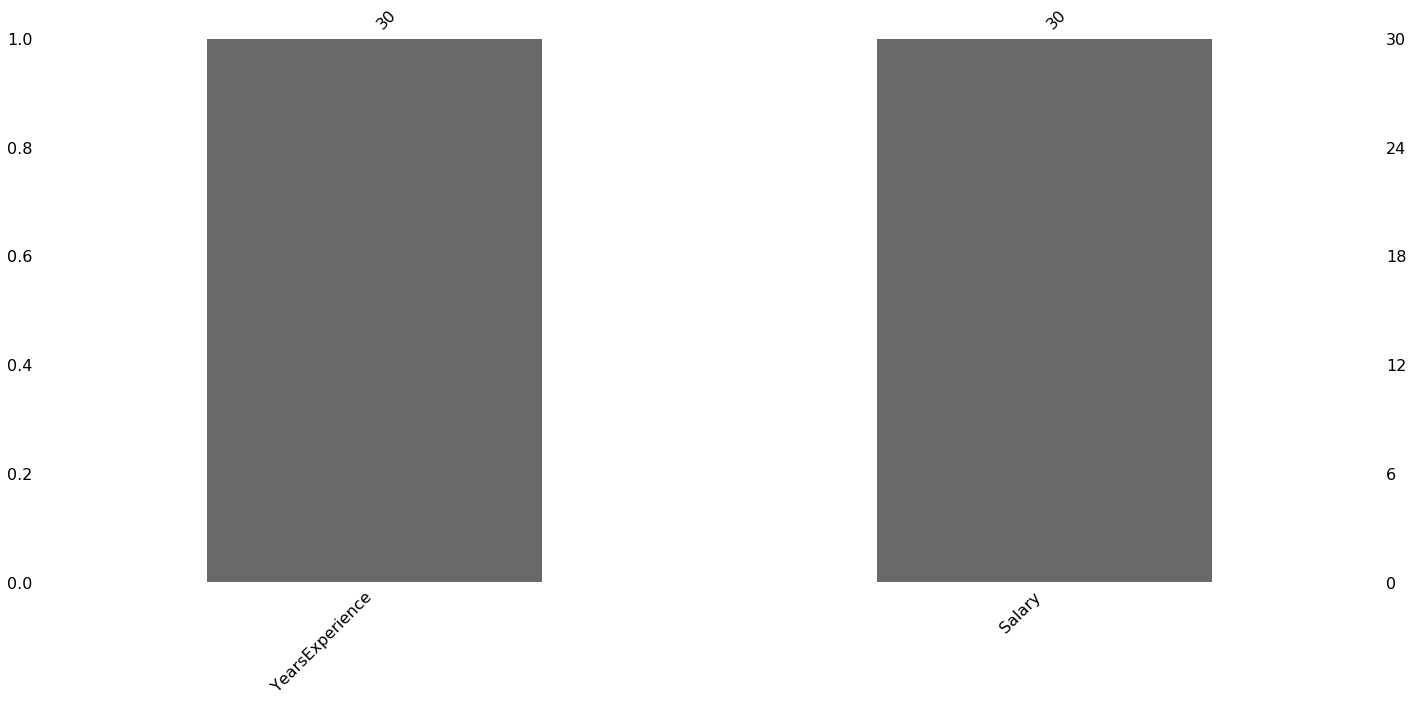

In [38]:
# Analysizing Null values
slr.isnull().sum()
msno.bar(slr)

## Splitting the Data 

In [39]:
# Creating the matrix that contains only features and Other matrix which contains only dependent variable.
slr_x = slr.iloc[:,:-1].values # iloc stands for locate indexes. # iloc[#rows, #columns and exception  ] # Features matrix. 
slr_y= slr.iloc[:,-1].values # Dependent variable matrix

In [40]:
from sklearn.model_selection import train_test_split
slr_x_train, slr_x_test, slr_y_train,slr_y_test= train_test_split(slr_x,slr_y, test_size=0.2, random_state=1) #Random_state is nothing but fixing the seed. 

## Model Building

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(slr_x_train,slr_y_train)

LinearRegression()

##  Coefficient of Determination

In [42]:
regressor.score(slr_x_train, slr_y_train)

0.9677558036981184

## Regression Equation

In [43]:
# Simple Linear Equation
print("For every 1 year experience there will be ",regressor.coef_,"in Salary")
print("Minimum salary for a fresher is:",regressor.intercept_)

For every 1 year experience there will be  [9332.94473799] in Salary
Minimum salary for a fresher is: 25609.89799835482


## Predicting Training Results

In [44]:
y_pred = regressor.predict(slr_x_test)

## Visualizing the Training Results

Text(0, 0.5, 'Salary')

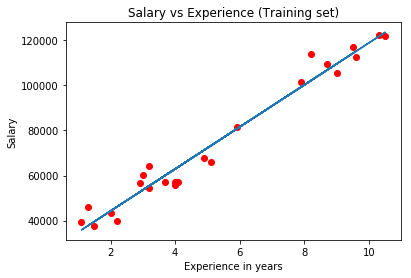

In [45]:
plt.scatter(slr_x_train,slr_y_train , color= 'red')
plt.plot(slr_x_train,regressor.predict(slr_x_train))
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Experience in years")
plt.ylabel("Salary")

## Visualizing the Test Results

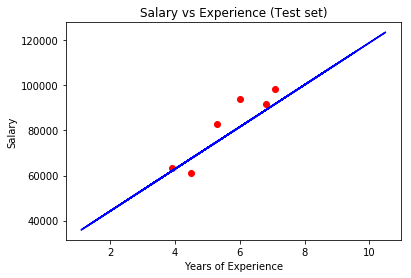

In [46]:
plt.scatter(slr_x_test, slr_y_test, color = 'red')
plt.plot(slr_x_train, regressor.predict(slr_x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()